<a href="https://colab.research.google.com/github/Desmondy10/STKI_A11.2022.14306_UAS/blob/main/STKI_A11_2022_14306_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Documentation - STKI**
##**Topik Project dan Identitas Lengkap**

###**Topik Project:** Analisis Sentimen Twitter Menggunakan Neural Network dengan TensorFlow

###**Identitas:**


*   Nama: Desmondy
*   NIM: A11.2022.14306
*   Mata Kuliah: Data Mining (A11.4517)
*   Program Studi: Teknik Informatika

#**Ringkasan dan Permasalahan Project**
###**Ringkasan:**
Analisis sentiment Twitter menggunakan neural network dengan TensorFlow menawarkan pendekatan yang canggih dan efektif dalam mengolah data teks besar dan memahami opini public dengan lebih baik. Dengan terus mengembangkan dan mengoptimalkan model-model ini, kita dapat memberikan kontribusi yang signifikan dalam mendapatkan wawasan berharga dari data teks yang dihasilkan oleh pengguna media social. Analisis sentiment terhadap tweet di Twitter sangat penting untuk memahami pandangan dan perasaan pengguna terhadap berbagai topik, produk, atau peristiwa tertentu.

###**Permasalahan:**
Bagaimana menganalisis sentimen pada tweet di Twitter secara efektif untuk memahami opini publik, pandangan, dan perasaan pengguna terhadap topik, produk, atau peristiwa tertentu, dengan memanfaatkan neural network berbasis TensorFlow untuk mengolah data teks dalam jumlah besar secara akurat.

###**Tujuan:**
Membuat model yang dapat melakukan analisis sentiment pada twitter untuk mengklasifikasikan apakah sebuah sentimen yang ada dapat membangun atau tidak.

##**Bagan Proses**
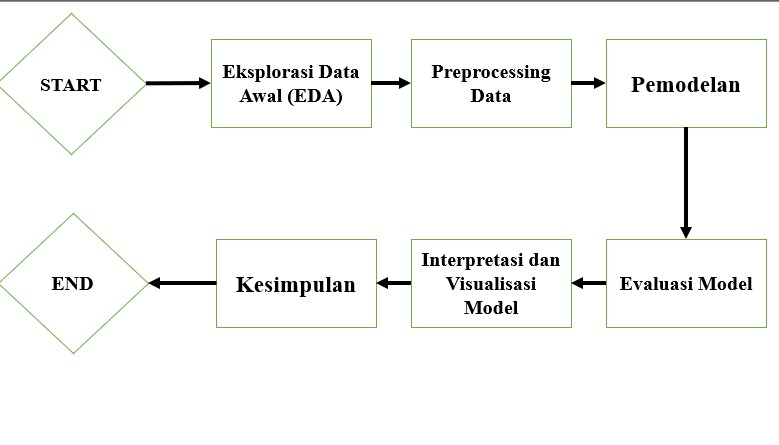

###**Import Library:**


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from wordcloud import WordCloud
from google.colab import drive
drive.mount('/content/drive')
# Download stopwords
nltk.download('stopwords')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Function to load and process data
file_path = "/content/drive/My Drive/training.1600000.processed.noemoticon.csv"

###**Penjelasan Dataset:**
Dataset yang digunakan adalah sebuah file CSV dengan nama training.1600000.processed.noemoticon.csv, yang berisi data tweet yang sudah diproses. Dataset ini digunakan untuk analisis sentimen dengan label "positive" atau "negative". Setiap baris dalam dataset berisi kolom-kolom berikut:



1.   **label**: Label sentimen dari tweet tersebut (positif atau negatif).
2.   **time**: Waktu tweet tersebut diposting.
3.   **date**: Tanggal tweet diposting.
4.   **query**: Jenis query atau pencarian yang digunakan untuk memperoleh tweet.
5. **username**: Nama pengguna yang memposting tweet.
6. **text**: Isi dari tweet itu sendiri (teks yang akan dianalisis).


    
    
    
    
    

In [ ]:
# Load data
data = pd.read_csv("/content/drive/My Drive/training.1600000.processed.noemoticon.csv", encoding="ISO-8859-1", header=None)
# Menambahkan kolom sesuai deskripsi dataset
data.columns = ["label", "time", "date", "query", "username", "text"]

In [ ]:
# Display data
print("Sample data:")
print(data.head())

Sample data:
   label        time                          date     query         username  \
0      0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1      0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2      0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3      0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4      0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                                text  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....  


###**Menampilkan informasi data**

In [ ]:
# Data info
print("Columns:", data.columns)
print("Shape:", data.shape)
data.info()

Columns: Index(['label', 'time', 'date', 'query', 'username', 'text'], dtype='object')
Shape: (1600000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1600000 non-null  int64 
 1   time      1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   username  1600000 non-null  object
 5   text      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


###**Mengecek nilai yang hilang**

In [ ]:
# Check for null values
print(f"Number of rows with missing values: {np.sum(data.isnull().any(axis=1))}")

Number of rows with missing values: 0


###**Menganalisis label sentimen (Positif dan Negatif) dalam dataset dengan menggunakan diagram batang**

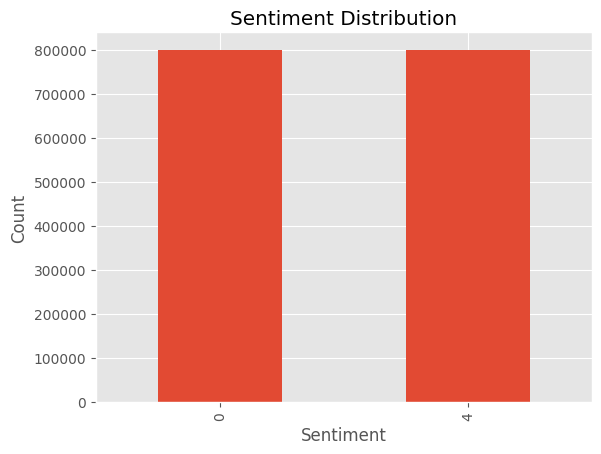

In [ ]:
# Sentiment distribution
sentiment_counts = data['label'].value_counts()
sentiment_counts.plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

###**Grafik Pie Chart**

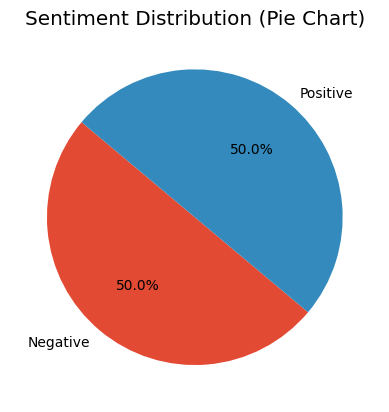

In [ ]:
# Pie chart
fig, ax = plt.subplots()
ax.pie(sentiment_counts, labels=['Negative', 'Positive'], autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution (Pie Chart)")
plt.show()

###**Menampilkan kata-kata yang sering muncul dari dataset**

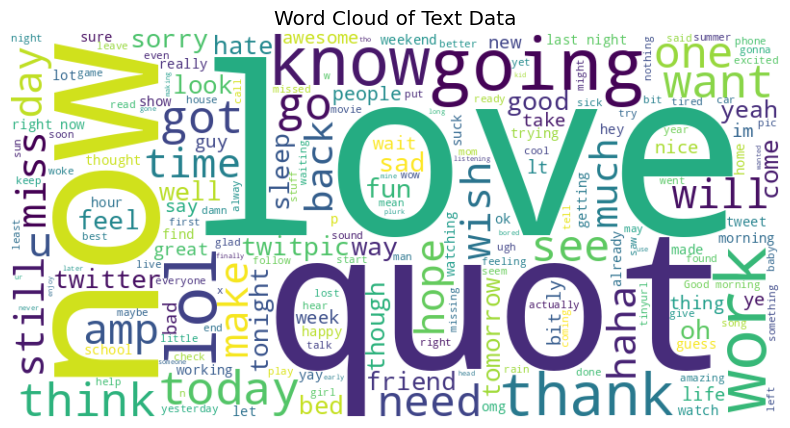

In [ ]:
# Wordcloud
all_text = ' '.join(data['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Text Data")
plt.show()

##**Menggunakan subset data yang lebih kecil untuk melakukan pelatihan model agar prosesnya lebih cepat**

In [ ]:
# Use a subset of data for training
subset_size = 10000  # Define the subset size
data_subset = data.sample(n=subset_size, random_state=42)
print(f"Subset size for training: {len(data_subset)}")

Subset size for training: 10000


In [ ]:
# Model training
max_words = 1000
max_len = 150

##**Tokenisasi:**
Menggunakan tokenizer untuk mengubah teks menjadi urutan angka yang dapat diproses oleh model. Tokenizer akan memetakan kata-kata dalam teks ke dalam index berdasarkan frekuensi kemunculan pada dataset

Kemudian menggunakan padding pada urutan token untuk memastikan setiap tweet memiliki panjang yang sama agar model bisa menerima inputan yang konsisten

In [ ]:

tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
tokenizer.fit_on_texts(data_subset['text'].values)
X = tokenizer.texts_to_sequences(data_subset['text'].values)
X = sequence.pad_sequences(X, maxlen=max_len)
Y = pd.get_dummies(data_subset['label']).values

###**Pembagian data training dan data testing menjadi 80:20**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (8000, 150)
Test data shape: (2000, 150)


##**Membangun Model LStM (Long Short-Term Memory)**
data yang telah siap, kemudian membangun model LSTM menggunakan Keras. LSTM adalah jenis **Recurrent Neural Network (RNN)** yang efektif untuk mengolah data urutan seperti teks.

1. **Embedding Layer**: Lapisan ini mengonversi kata-kata menjadi representasi vektor dengan dimensi yang lebih kecil. Di sini, dimensi vektor kata adalah 50, dan jumlah kata yang dipertimbangkan adalah 1000 (parameter max_words).

2. **LSTM Layer**: Lapisan ini memproses urutan kata, memanfaatkan memori jangka panjang untuk menangkap pola dalam urutan teks.

3. **Dense Layer**: Lapisan fully connected yang menghubungkan output LSTM dengan layer berikutnya.

4. **Activation 'ReLU'**: Fungsi aktivasi ReLU digunakan untuk memperkenalkan non-linearity pada model.

5. **Dropout Layer**: Dropout digunakan untuk mengurangi overfitting dengan secara acak menonaktifkan beberapa neuron selama pelatihan.

6. **Output Layer**: Lapisan output menggunakan softmax activation karena ini adalah masalah klasifikasi dengan dua kelas (positif dan negatif). Softmax memastikan bahwa output adalah probabilitas yang dijumlahkan menjadi 1.

In [ ]:
inputs = Input(name='inputs', shape=[max_len])
layer = Embedding(max_words, 50, input_length=max_len)(inputs)
layer = LSTM(64)(layer)
layer = Dense(256, name='FC1')(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(2, name='out_layer')(layer)
layer = Activation('softmax')(layer)
model = Model(inputs=inputs, outputs=layer)
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


###**Pelatihan Model dengan 20 epoch**

In [ ]:
history = model.fit(X_train, Y_train, batch_size=80, epochs=20, validation_split=0.1)
print("Training complete!")

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.5326 - loss: 0.6889 - val_accuracy: 0.6587 - val_loss: 0.6128
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.7088 - loss: 0.5739 - val_accuracy: 0.7362 - val_loss: 0.5290
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.7615 - loss: 0.5002 - val_accuracy: 0.7588 - val_loss: 0.5082
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 109ms/step - accuracy: 0.7598 - loss: 0.5213 - val_accuracy: 0.7462 - val_loss: 0.5147
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.7883 - loss: 0.4566 - val_accuracy: 0.7538 - val_loss: 0.5057
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 119ms/step - accuracy: 0.7961 - loss: 0.4459 - val_accuracy: 0.7450 - val_loss: 0.5053
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 131ms/step - accuracy: 0.7944 - loss: 0.4521 - val_accuracy: 0.7487 - val_loss: 0.5097
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 110ms/step - accuracy: 0.8096 - loss: 0.4244 - val_accu

In [ ]:
# Save model
model.save('sentiment_analysis_model.keras')  # Save model in .keras format

###**Mengevaluasi Model**

In [ ]:
# Evaluate model
accr1 = model.evaluate(X_test, Y_test)
print(f"Test set Accuracy: {accr1[1]:0.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6866 - loss: 0.8979
Test set Accuracy: 0.70


###**Prediksi dengan Model**
Setelah model dievaluasi, model digunakan untuk memprediksi sentimen dari data uji. Model memberikan output berupa probabilitas sentimen positif atau negatif. Prediksi diklasifikasikan sebagai 1 (positif) atau 0 (negatif) dengan menggunakan threshold 0.5.

In [ ]:
# Predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


##**Confusion Matrix**
Mengevaluasi kinerja model dengan melihat sejauh mana akurasi prediksi model

In [ ]:
# Confusion Matrix
CR = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Confusion Matrix:")
print(CR)

Confusion Matrix:
[[653 327]
 [281 739]]


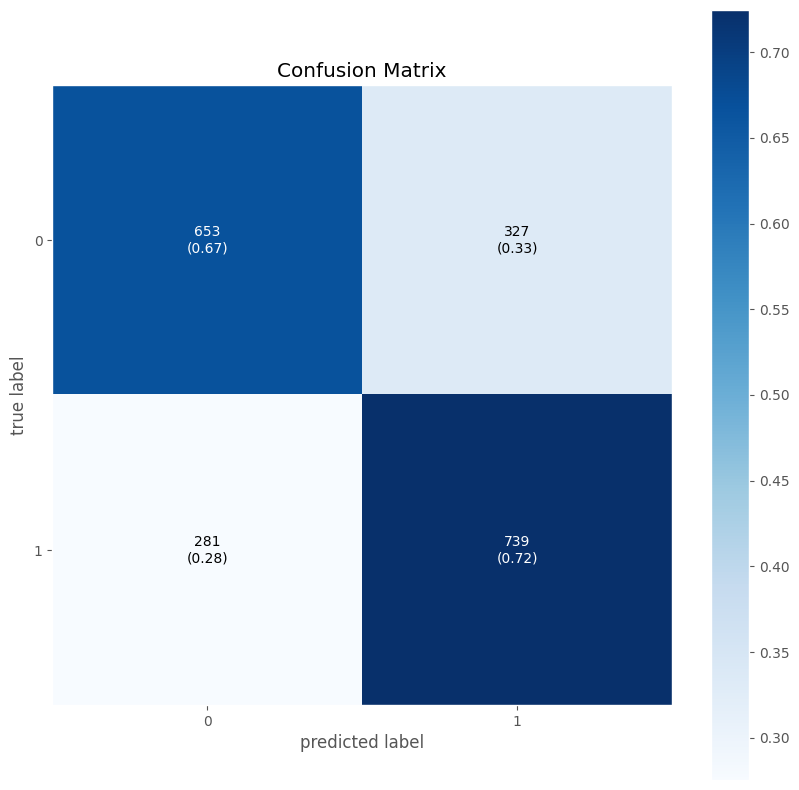

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=CR, figsize=(10, 10), show_absolute=True, show_normed=True, colorbar=True)
plt.title("Confusion Matrix")
plt.show()

##**ROC Curve**
Menilai trade-off antara sensitivitas (True Positive rate) dan spesifitas (False Positive Rate) pada berbagai treshold

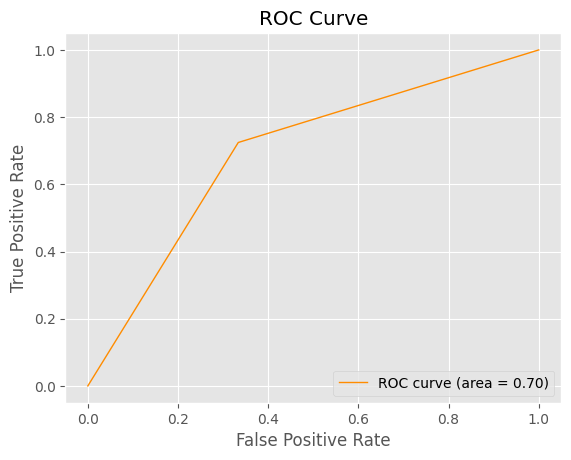

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

##**Menghitung Accuracy, Precision, recall dan F1-Score dari model. Metrics ini akan memberikan gambaran seberapa baik model mengklasifikasikan sentimen

In [ ]:
# Metrics
accuracy = accuracy_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
precision = precision_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
recall = recall_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
f1 = f1_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.696
Precision: 0.6932457786116323
Recall: 0.7245098039215686
F1 Score: 0.7085330776605945


##**Prediksi Sentimen Pengguna**
Pengguna dapat memasukkan sentimen agar dapat diprediksi sentimennya oleh model

In [ ]:
# Allow user to input text for prediction
user_input = input("Enter text for sentiment prediction: ")
if user_input:
    user_input_seq = tokenizer.texts_to_sequences([user_input])
    user_input_pad = sequence.pad_sequences(user_input_seq, maxlen=max_len)
    prediction = model.predict(user_input_pad)
    sentiment = 'Positive' if prediction.argmax(axis=1)[0] == 1 else 'Negative'
    print(f"Predicted Sentiment: {sentiment}")

Enter text for sentiment prediction: Jelek banget kak
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Sentiment: Positive


#**Diskusi Hasil dan Kesimpulan**

##**Performa Model**
1. **Akurasi (Accuracy): 69.6%**
    Model berhasil memprediksi sentiment dengan benar pada hamper 70% dari total data uji. Namun, akurasi ini masih dapat ditingkatkan untuk mencapai standar performa yang lebih tinggi.

2. **Presisi (Precision): 69.3%**
    Dari semua prediksi sentiment positif, sekitar 69.3% di antaranya benar-benar positif. Ini menunjukkan bahwa model cukup baik dalam meminimalkan False Positives.

3. **Recall: 72.5%**
    Dari semua data sentiment positif yang sebenarnya, model berhasil mengidentifikasi 72.5%. Model cukup baik dalam menangkap sentiment positif.

4. **F1 Score: 70.9%**
    Kombinasi antara presisi dan recall menunjukkan model memiliki keseimbangan yang cukup baik dalam menangkap prediksi yang benar dan menghindari kesalahan.

### **Kelebihan Model**
1. **Kemampuan Menangkap Data Positif (Recall Tinggi)**: Model bekerja cukup baik untuk memastikan sentimen positif tidak terlewat.

2. **Keseimbangan Presisi dan Recall**: Dengan F1 Score di atas 70%, model menunjukkan keseimbangan yang baik dalam prediksi.

3. **Stabilitas Pelatihan**: Model berbasis LSTM dapat menangani data teks sequential dengan cukup baik.

###**Kekurangan Model**
1. **Akurasi yang Moderat**: Akurasi 69.6% menunjukkan bahwa hampir 30% prediksi masih salah. Ini menunjukkan adanya potensi peningkatan.

2. **Presisi yang Lebih Rendah**: Presisi sedikit lebih rendah dari recall, yang berarti model cenderung memberikan lebih banyak False Positives.

3. **Kesederhanaan Model**: Model hanya menggunakan LSTM dasar, sehingga mungkin kurang optimal dibandingkan model pretrained seperti BERT.

##**Kesimpulan**
Model ini sudah cukup baik sebagai langkah awal dalam analisis sentimen, dengan performa yang seimbang antara presisi dan recall. Namun, untuk aplikasi dunia nyata yang memerlukan akurasi dan reliabilitas lebih tinggi (misalnya, >80%), model ini masih memerlukan peningkatan dari sisi preprocessing, arsitektur, dan pemanfaatan model pretrained. Dengan pengoptimalan lebih lanjut, model sentiment analysis ini dapat menghasilkan prediksi yang lebih akurat dan andal.